In [1]:
import gym
from Dueling_DQN_RL_brain import DuelingDQN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


env = gym.make('Pendulum-v0')
env = env.unwrapped
env.seed(1)
MEMORY_SIZE = 3000
ACTION_SPACE = 25

sess = tf.Session()
with tf.variable_scope('natural'):
    natural_DQN = DuelingDQN(
        n_actions=ACTION_SPACE, n_features=3, memory_size=MEMORY_SIZE,
        e_greedy_increment=0.001, sess=sess, dueling=False)

with tf.variable_scope('dueling'):
    dueling_DQN = DuelingDQN(
        n_actions=ACTION_SPACE, n_features=3, memory_size=MEMORY_SIZE,
        e_greedy_increment=0.001, sess=sess, dueling=True, output_graph=True)

sess.run(tf.global_variables_initializer())


def train(RL):
    acc_r = [0]
    total_steps = 0
    observation = env.reset()
    while True:
        # if total_steps-MEMORY_SIZE > 9000: env.render()

        action = RL.choose_action(observation)

        f_action = (action-(ACTION_SPACE-1)/2)/((ACTION_SPACE-1)/4)   # [-2 ~ 2] float actions
        observation_, reward, done, info = env.step(np.array([f_action]))

        reward /= 10      # normalize to a range of (-1, 0)
        acc_r.append(reward + acc_r[-1])  # accumulated reward

        RL.store_transition(observation, action, reward, observation_)

        if total_steps > MEMORY_SIZE:
            RL.learn()

        if total_steps-MEMORY_SIZE > 15000:
            break

        observation = observation_
        total_steps += 1
    return RL.cost_his, acc_r

c_natural, r_natural = train(natural_DQN)
c_dueling, r_dueling = train(dueling_DQN)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


target_params_replaced


targ

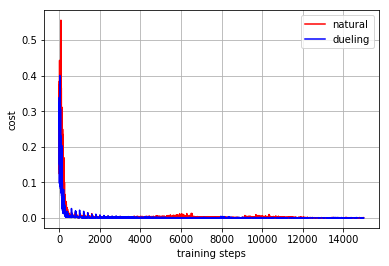

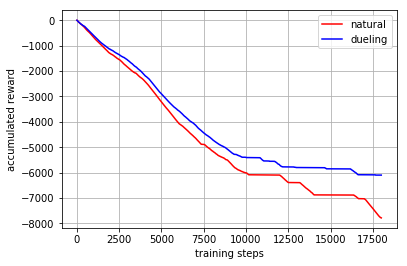

In [2]:
plt.figure(1)
plt.plot(np.array(c_natural), c='r', label='natural')
plt.plot(np.array(c_dueling), c='b', label='dueling')
plt.legend(loc='best')
plt.ylabel('cost')
plt.xlabel('training steps')
plt.grid()

plt.figure(2)
plt.plot(np.array(r_natural), c='r', label='natural')
plt.plot(np.array(r_dueling), c='b', label='dueling')
plt.legend(loc='best')
plt.ylabel('accumulated reward')
plt.xlabel('training steps')
plt.grid()

plt.show()